In [4]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install mpi4py
!pip install stable-baselines[mpi]

In [3]:
!pip install tensorflow==1.14

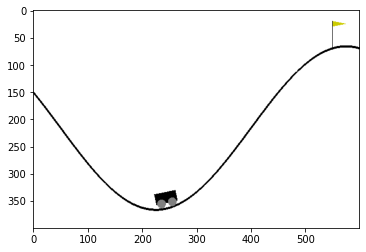

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


env = gym.make('MountainCarContinuous-v0')

# the noise objects for DDPG
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

model = DDPG(MlpPolicy, env, verbose=1, param_noise=param_noise, action_noise=action_noise)
model.learn(total_timesteps=4000)
model.save("ddpg_mountain")

del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_mountain")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

